# **Aim of the project**
The aim of this project is to employ ML regression to solve inverse problems in topological photonics, i.e., to design photonic topological insulators enabling innovative applications through custom tailoring of desired optical parameters. The NN is trained with the Aubry-Andre-Harper band structure model and then is adopted to solve the inverse problems. To ensure that only physically viable solutions are found, a self-consistent cycle is implemented in which tentative solutions from the inverse problem NN is run through direct problem NN to ensure that the solution is indeed viable.

# **What is topological photonics?**
First of all, what is photonics? It is the science of manipulating the various aspects of light waves for various applications. Photonics is to optics analogous to how electronics work.\
Topological photonics is a sub-field of photonics which seeks to manipulate new types of electromagnetic waves having topological properties. This field is inspired from topological insulators in condensed matter physics. 

# **Topological insulators**
In very simple words, they are insulator in the bulk, but metallic, or conducting, on the edges. \ 
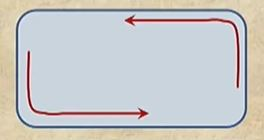 \
These edge states are topologically protected, i.e., they are scatter free. They don't back scatter, or scatter in the bulk. This edge states are somewhat similar to what is observed in quantum Hall effect.\

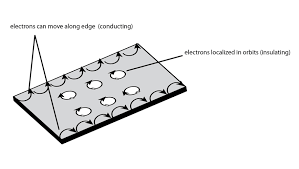
## Explaination for edge states
The topological invariant for the band structures of the insulators is defined by a quantity called Chern number(C). This quantity is defines as-
$$C = \frac{1}{2\pi}\int\int dk_x dk_y F_{xy} (k),$$
which is integral of the Berry Curvature in momentum space.
### Berry curvature
Consider the case of anomalous Hall effect. [IMG] This is very closely related to the Hall effect. But here, the Hall voltage, $V_H \neq 0 V$ even after removing the external magnetic field $\mathbf{B}$. $\mathbf{B_{ext}} =0$, so does that mean $\mathbf{B_{int}}\neq 0$ and this is the reason for non-zero $V_H$? The answer is no, since this effect was also observed for graphene, whose internal magnetic field is negligible. 
To understand further, we investigate the quantum effects. We write the Hamiltonian in momentum representation, and solve the Schrodinger's equation.
$$\hat{H}(\vec{k}(t)); \hspace{3pt} |\Psi\rangle = e^{-\iota \phi (t)} |n\rangle ; \hspace{3pt} |n\rangle \rightarrow \text{eigenstates}.$$
When we solve the Schrodinger's equation: $\hat{H}|\Psi \rangle = \iota \hbar \frac{d}{dt}|\Psi\rangle$, we get the following phase term-
$$\phi (t) = \frac{1}{\hbar} \int_0^t E_n (\vec{k} (t'))dt' - \iota \int_0^t \langle n(\vec{k} (t'))| \frac{d}{dt'}| n (\vec{k} (t')) \rangle dt'$$
Here the first term is the dynamical phase, that is the convenional term obtained from solving the Schrodinger equation by separation of variables in its real space representation as follows-
$$\Big[ V(\vec(r) - \frac{\hbar ^2}{2m} \vec{\nabla}^2) \Big] \Psi (\vec{r} , t) = \iota \hbar \partial_t \Psi (\vec{r}, t)$$ $$\Psi (\vec{r}, t) = \psi (\vec{r}) \phi (t).$$
The second term is called "Berry phase" which corresponds some to time dependent adiabatic transport. This term can be set to zero by using apropriate gauge transformation. This is true except for the case when this adiabatic transport corresponds to closed paths. Magnetic fields are also related to closed paths. So there is a vague analogy between them, and we can say that this Berry phase term is what explains the anomalous Hall effect.
We can write the berry phase term as-
$$\iota \int_0^t \langle n(\vec{k} (t'))| \frac{d}{dt'}| n (\vec{k} (t')) \rangle dt' = \int_C d\vec{k}.\vec{A},$$
where, $\vec{A} = \iota \langle n | \vec{\nabla}_k | n \rangle$. Now, using Stoke's theorem,
$$\int_C d\vec{k}.\vec{A} = \iota\int d\vec{s}.\vec{F},$$
where, $\vec{F} = \vec{\nabla}_k \times \vec{A}$ is the Berry curvature. \
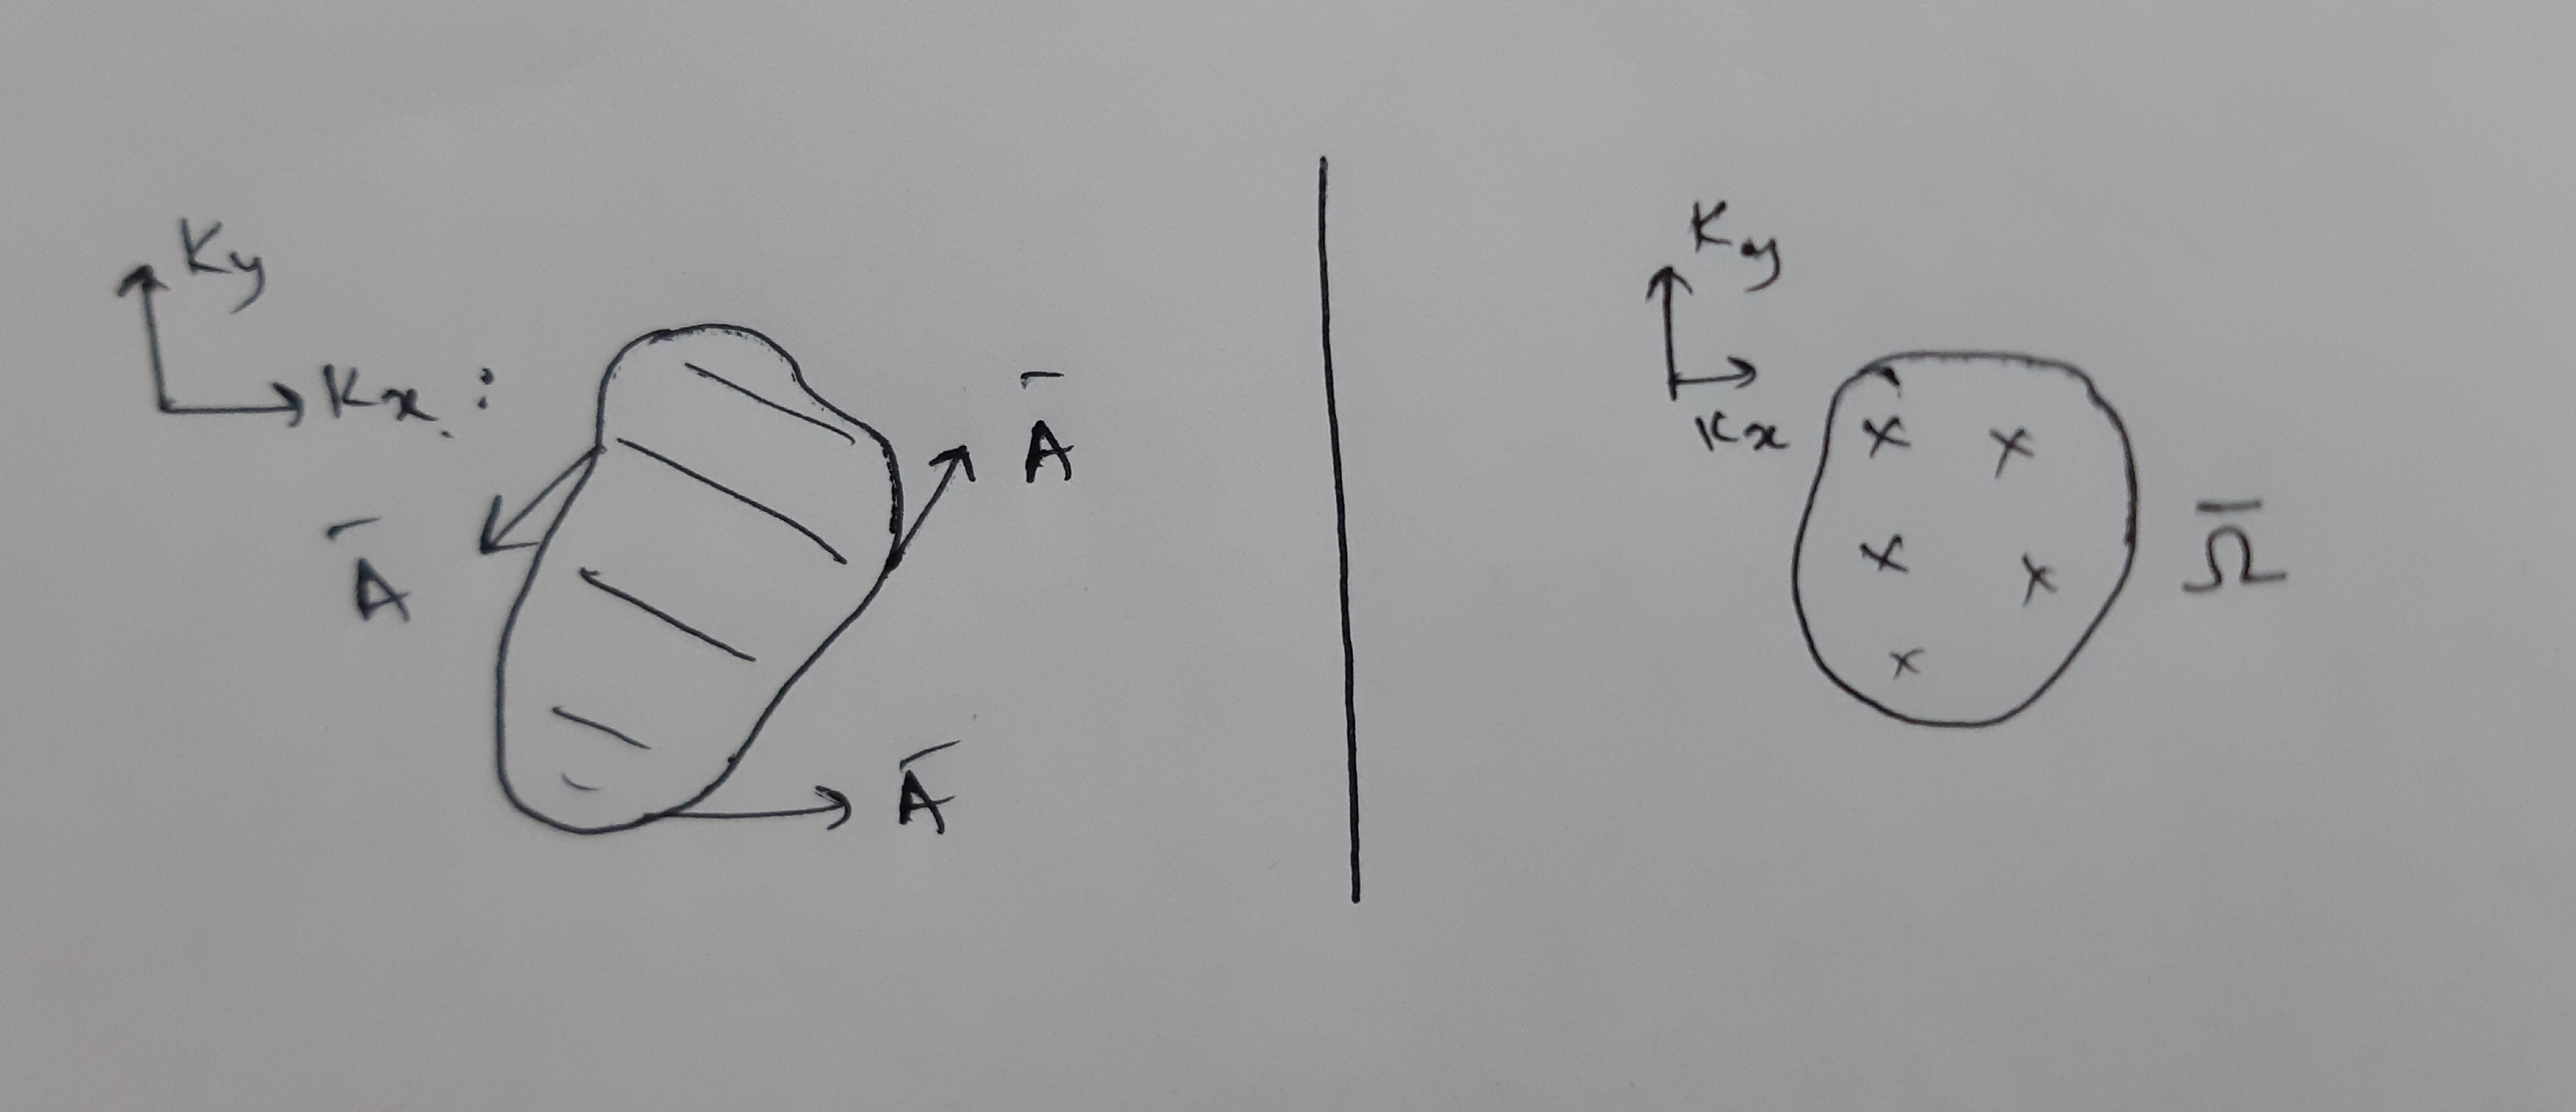 \

Coming, back to the Chern number, it depends on two things-

*   no. of filled states,
*   mathematical structure of these filled states.

But we are concerned with only adiabatic transformations which preserve the structure, or in simple words, they are very slow. We are left with only no. of filled states. Therefore, we are free to deform the Hamiltonian or band structure in any way we want until we don't cross fermi level(which can be intuitively thought of as the hole in space) doing which we change the topological invariant. Or in other words, to change the topological invariant, close the gap and then reopen it. This gives rise to the "gapless edge states" which are localised at the edges. \
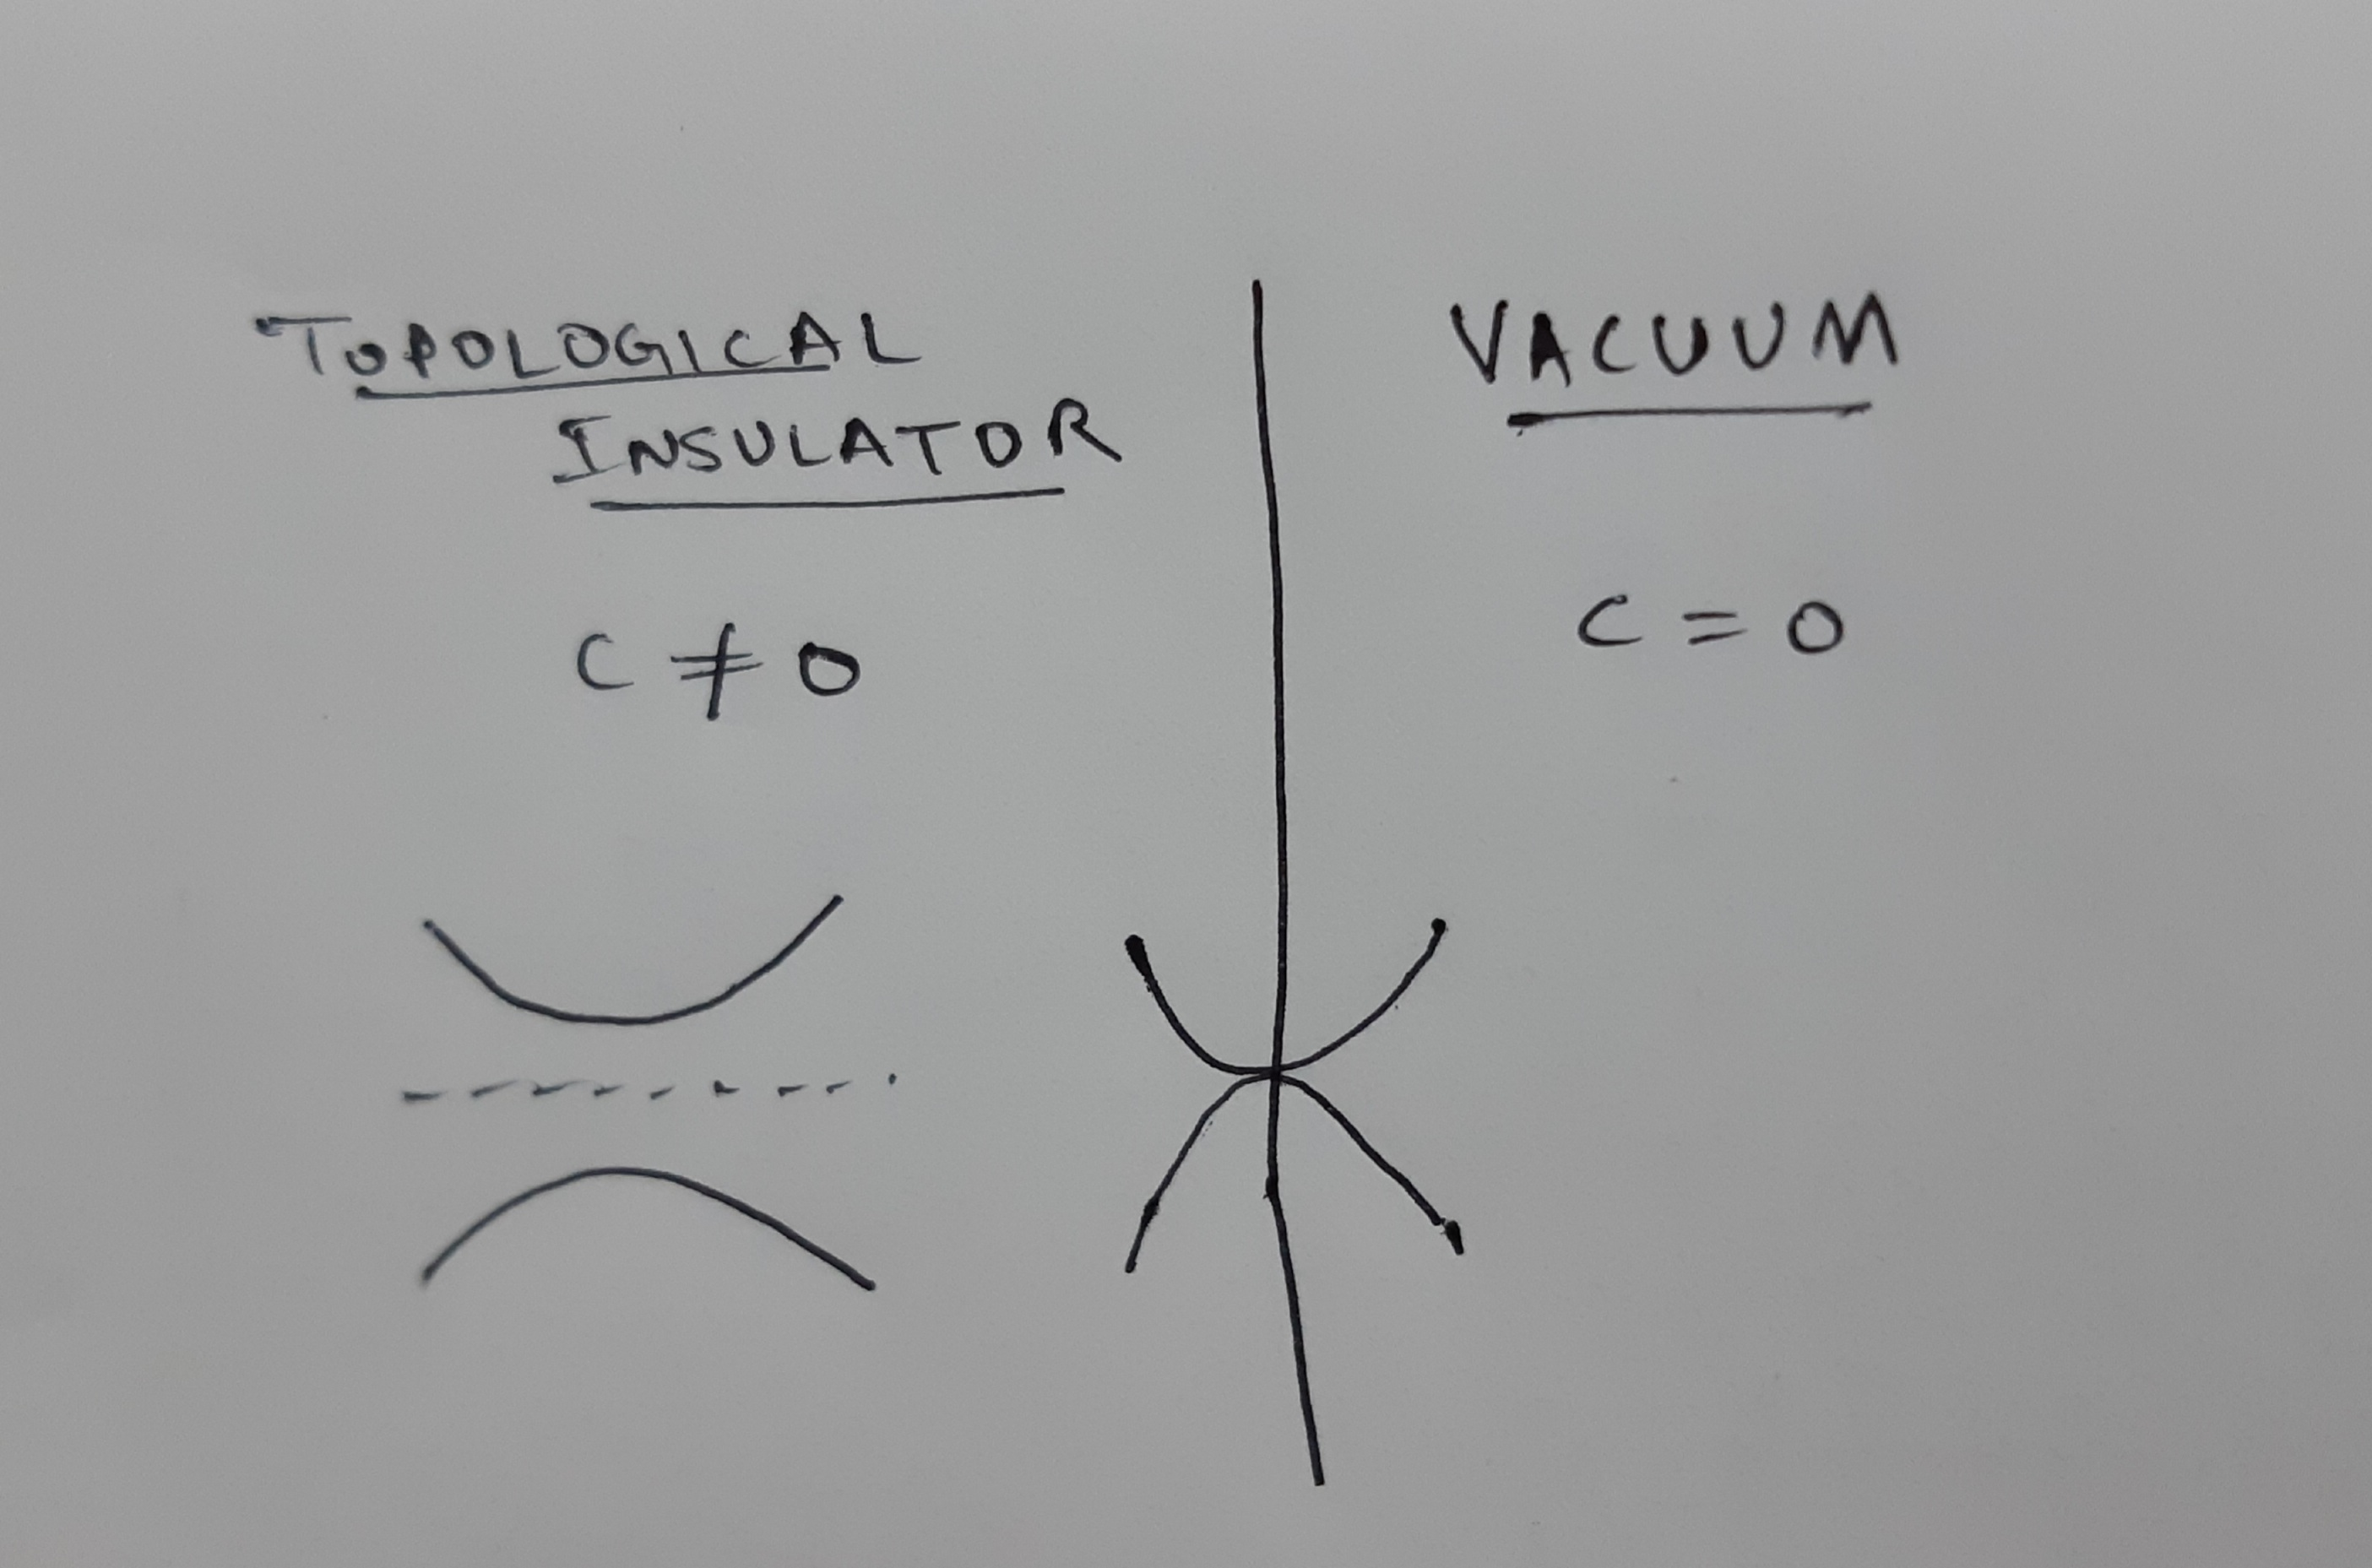 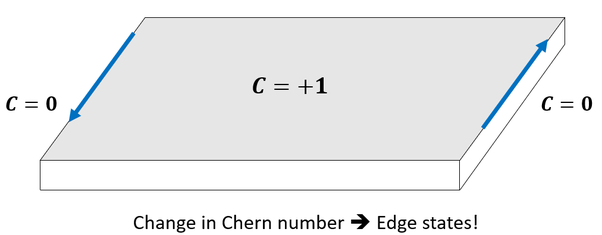\
The image shows the intersection of two different materials and how edge states are formed.\
Normal insulators have trivial, i.e., 0 Chern number. But we can create materials with non-trivial Chern numbers. This can be accomplished by breaking the time reversal symmetry by applying a magnetic field to the material. \
In 2D, these are 1D wire states along the edges. In 3D, these are 2D surface states.\
Now the question is, how to bring these ideas in photonics?





# **From electrons to light**
In 1987, S. John and E. Yablonovitch independently came up with an idea. For photons, we can fabricate materials which consists of different materials of different refractive indices stacked in a certain order. These are called photonic crystals. 
They act in a similar way to photons as lattices do to electrons.\
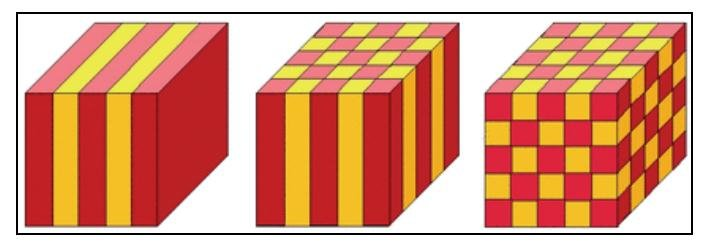 \
If we are able to engineer such materials carefully enough then, as in the figure below, we obtain a band gap for photons. So, for certain frequencies, light won't be able to travel through the crystal.\
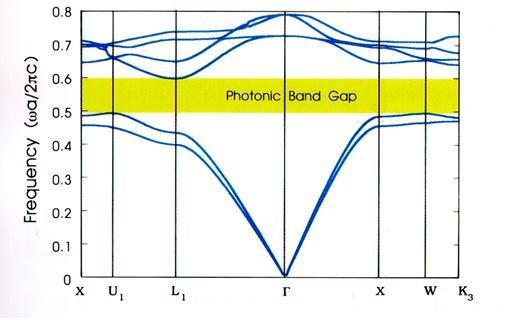 \
There are no fermi levels as seen in the image. These materials can be used to create highly efficient mirrors, fibers which can carry light with high efficiency and low leakage, etc.\
Inspired from condensed matter physics, D. Haldane suggested that if we can create insulators for light, which are photonic crystals, then we can also create topological insulators for light. In a 2008 paper woth S. Raghu, D. Haldane argued that we can do such a thing by breaking the time reversal symmetry in a photonic crystal. In condensed matter physics, we applied magnetic field to break time reversal symmetry. The equivalent of this in photonics is to use certain materials called magneto-optic materials. These are materials which can change properties when magnetic field is applied.\
Reading the proposel of Haldane and Raghu, Wang et al synthesised the very first topological photonic crystal and published it in a paper in 2009. \
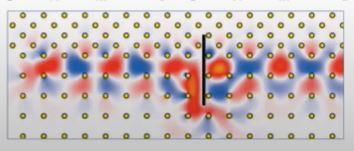 \
This topological photonic crystal woked very well for microwave light, but the magnetic response was weak for visible and infrared light. This implied that the opened band gap was very small.\
To fix these issues, various other proposels were made and synthesis were done. These included M. Hafezi who devised a method based on a optical resonator lattice with engineered couplings (2013), Rechtsman et al used lattice of helical waveguides (2013), etc.


# **Aubry–Andre–Harper (AAH) model**
We will be using Aubry–Andre–Harper band structure model to train our neural network which is a little advanced topic so it will be better to give an explaination about the variables that are being used to train the neural network.


## Derivation of the Aubry–Andre–Harper (AAH) model
We will start by writing hamiltonian in tight-binding approximation
### Wannier function
$$
\phi(r)=\sum_{n} b_{n} \psi_{n}(r)
$$
### Tight binding approximation:
A method of calculating energy states and wave functions of electrons in a solid in which the wave function is assumed to be a sum of pure atomic wave functions centered about each of the atoms in the lattice, each multiplied by a phase factor

$$
|\psi(\mathbf{r})\rangle=\sum_{\mathbf{R}} a_{\mathbf{R}}\left|\phi_{\mathbf{R}}(\mathbf{r})\right\rangle
$$
where the wannier states $$\left|\phi_{\mathbf{R}}(\mathbf{r})\right\rangle$$ are localized at their corresponding lattice sites **R**

The tight-binding approximation for the zero-magnetic field case is obtained by plugging
the above expansion into the eigenvalue equation
$$
\begin{aligned}
\left(\frac{1}{2 m} \mathbf{p}^{2}+\hat{V}(\mathbf{r})\right) \sum_{\mathbf{R}} a_{\mathbf{R}}\left|\phi_{\mathbf{R}}(\mathbf{r})\right\rangle &=E \sum_{\mathbf{R}} a_{\mathbf{R}}\left|\phi_{\mathbf{R}}(\mathbf{r})\right\rangle \\
\sum_{m, n} \hat{H}_{0} a_{m, n}\left|\phi_{m, n}(\mathbf{r})\right\rangle &=\sum_{m, n} E a_{m, n}\left|\phi_{m, n}(\mathbf{r})\right\rangle \\
\sum_{k, l}\left|\phi_{k, l}\right\rangle\left\langle\phi_{k, l}\left|\sum_{m, n} \hat{H}_{0} a_{m, n}\right| \phi_{m, n}\right\rangle &=\sum_{k, l}\left|\phi_{k, l}\right\rangle\left\langle\phi_{k, l}\left|\sum_{m, n} E a_{m, n}\right| \phi_{m, n}\right\rangle
\end{aligned}
$$
Switching dummy indices on the left
$$
\begin{aligned}
\sum_{m, n}\left|\phi_{m, n}\right\rangle\left\langle\phi_{m, n}\left|\sum_{k, l} \hat{H}_{0} a_{k, l}\right| \phi_{k, l}\right\rangle &=\sum_{k, l}\left|\phi_{k, l}\right\rangle\left\langle\phi_{k, l}\left|\sum_{m, n} E a_{m, n}\right| \phi_{m, n}\right\rangle \\
\sum_{m, n, k, I} a_{k, l}\left\langle\phi_{m, n}\left|\hat{H}_{0}\right| \phi_{k, l}\right\rangle\left|\phi_{m, n}\right\rangle &=\sum_{k, l, m, n} E a_{m, n}\left\langle\phi_{k, l} \mid \phi_{m, n}\right\rangle\left|\phi_{m, n}\right\rangle \\
\sum_{m, n} \sum_{k, l} a_{k, 1}\left\langle\phi_{m, n}\left|\hat{H}_{0}\right| \phi_{k, l}\right\rangle\left|\phi_{m, n}\right\rangle &=\sum_{k, l, m, n} E a_{m, n} \delta_{k, m} \delta_{l, n}\left|\phi_{m, n}\right\rangle \\
\sum_{m, n} \sum_{k, l} a_{k, l}\left\langle\phi_{m, n}\left|\hat{H}_{0}\right| \phi_{k, l}\right\rangle\left|\phi_{m, n}\right\rangle &=\sum_{m, n} E a_{m, n}\left|\phi_{m, n}\right\rangle
\end{aligned}
$$
Comparing coefficients of $\left|\phi_{m, m}\right\rangle$
$$
\sum_{k, l} a_{k, l}\left\langle\phi_{m, n}\left|\hat{H}_{0}\right| \phi_{k, l}\right\rangle=E a_{m, n}
$$
$$
\sum_{k \neq m, l \neq n} a_{k, l}\left\langle\phi_{m, n}\left|\hat{H}_{0}\right| \phi_{k, l}\right\rangle+a_{m, n}\left\langle\phi_{m, n}\left|\hat{H}_{0}\right| \phi_{m, n}\right\rangle=E a_{m, n}
$$
Now we will rewrite the above equation as:$$
\sum_{k \neq 0, l \neq 0} a_{m+k, n+l}\left\langle\phi_{0,0}\left|\hat{H}_{0}\right| \phi_{k, l}\right\rangle=E a_{m, n}
$$
**Reasons:**
$$
\left\langle\phi_{m, n}\left|\hat{H}_{0}\right| \phi_{m, n}\right\rangle
$$
 is independent of indices m, n due to translation invariance of $$\hat{H}_{0}$$ . This is
set to zero, as this is equivalent to shifting the energy scale.

Translational symmetry also
means that$$
\left\langle\phi_{m, n}\left|\hat{H}_{0}\right| \phi_{k, l}\right\rangle=\left\langle\phi_{m-k, n-l}\left|\hat{H}_{0}\right| \phi_{0,0}\right\rangle
$$
Now,$$
\text { Designating } W_{k, l}=\left\langle\phi_{0,0}\left|\hat{H}_{0}\right| \phi_{k, l}\right\rangle
$$
Tight-binding approximation entails assuming that the
wannier functions are well localized and the overlap between far-off wannier states is approximately zero. Therefore, only interactions between the nearest neighbors is significant
in the summation defined above.
We also expect$$
W_{1,0}=W_{-1,0} \text { and } W_{0,1}=W_{0,-1}
$$

With these assumptions, the tight-binding equation is written as
$$
W_{1,0}\left(a_{m+1, n}+a_{m-1, n}\right)+W_{0,1}\left(a_{m, n+1}+a_{m, n-1}\right)=E a_{m, n}
$$
In matrix form, the Hamiltonian is written as
$$
\hat{H}_{0}=\sum_{m, n} W_{1,0}|m+1, n\rangle\left\langle m, n\left|+W_{0,1}\right| m, n+1\right\rangle\langle m, n|+\text { h.c. }
$$
This expression can be more simply expressed in terms of the translation operators$$
\hat{H}_{0}=W_{1,0} \hat{T}_{x}+W_{0,1} \hat{T}_{y}+\text { h.c. }
$$
When the magnetic field is non-zero, the expansion is written as
$$
|\psi(\mathbf{r})\rangle=\sum_{\mathbf{R}} a_{\mathbf{R}} e^{2 \pi \frac{i \epsilon}{\hbar} \int_{\mathbf{R}}^{r} \mathbf{A} \cdot d r^{\prime}}\left|\phi_{\mathbf{R}}(\mathbf{r})\right\rangle
$$
The line integral in the exponent is taken along the straight line path between the two
points. We have used a local gauge transformation of the wannier states in the above expansion.
Also ,the following
property holds under the approximation of slowly varying magnetic field
$$
\hat{H} e^{2 \pi \frac{i e}{h} \int_{R}^{r} \mathbf{A} \cdot d r^{\prime}}\left|\phi_{\mathbf{R}}\right\rangle=e^{2 \pi \frac{i e}{h} \int_{R}^{r} \mathbf{A} \cdot d r^{\prime}} \hat{H}_{0}\left|\phi_{\mathbf{R}}\right\rangle
$$
and for slowly varying magnetic field, the hopping integrals modify as$$
\left\langle\phi_{\mathbf{R}}\left|e^{-2 \pi \frac{i e}{h} \int_{\mathbf{R}}^{\mathbf{r}} \mathbf{A} \cdot d \mathbf{r}^{\prime}} \hat{H} e^{2 \pi \frac{i e}{h} \int_{\mathbf{R}^{\prime}}^{r} \mathbf{A} \cdot d \mathbf{r}^{\prime}}\right| \phi_{\mathbf{R}^{\prime}}\right\rangle=e^{2 \pi \frac{i e}{h} \int_{R}^{\mathbf{R}^{\prime}} \mathbf{A} \cdot d \mathbf{r}^{\prime}}\left\langle\phi_{\mathbf{R}}\left|\hat{H}_{0}\right| \phi_{\mathbf{R}^{\prime}}\right\rangle
$$
The above result is known as Peirels substitution. Therefore, the tight-binding Hamiltonian
in the presence of magnetic field is written as$$
\hat{H}=\sum_{m, n} W_{1,0} e^{2 \pi \frac{i e}{h} \int_{m d}^{(m+1) d} \mathbf{A} \cdot d \mathbf{x}}|m+1, n\rangle\left\langle m, n\left|+W_{0,1} e^{2 \pi \frac{i e}{h} \int_{n d}^{(n+1) d} \mathbf{A} \cdot d \mathbf{y}}\right| m, n+1\right\rangle\langle m, n|+\text { h.C. }
$$
In Landau gauge
$$
\hat{H}=\sum_{m, n} W_{1,0}|m+1, n\rangle\left\langle m, n\left|+W_{0,1} e^{2 \pi i \alpha m}\right| m, n+1\right\rangle\langle m, n|+\text { h.c. }
$$
where α is the magnetic flux through an unit cell

In terms of the lattice translation operators as
$$
\hat{H}=W_{1,0} \hat{T}_{x}+W_{0,1} e^{2 \pi i \alpha m} \hat{T}_{y}+h . c
$$
The eigenvalue equation is written as
$$
W_{1,0}\left(a_{m+1, n}+a_{m-1, n}\right)+W_{0,1}\left(e^{2 \pi i \alpha m} a_{m, n+1}+e^{-2 \pi i \alpha m} a_{m, n-1}\right)=E a_{m, n}
$$
Coefficients in the above equation, involve only m and do not depend on n. We therefore
assume plane wave behaviour along y-direction and assume$$
a_{m n}=e^{i n \theta} a_{m}
$$
On substitution,
we obtain the harper equation$$
a_{m+1}+a_{m-1}+\lambda \cos (2 \pi m \alpha+\theta) a_{m}=E a_{m}
$$
Here $$
\lambda=W_{1,0} / W_{0,1}
$$
##  **Generalized Aubry–Andre–Harper model**
$$
\mathcal{H}_{S}=\sum_{r=1}^{N-1}\left(\hat{a}_{r}^{\dagger} \hat{a}_{r+1}+h . c\right)+\sum_{r=1}^{N} \frac{2 \lambda \cos (2 \pi b r+\phi)}{1-\alpha \cos (2 \pi b r+\phi)} \hat{a}_{r}^{\dagger} \hat{a}_{r}
$$
## Anderson Localisation
 Anderson localization (also known as strong localization) is the absence of diffusion of waves in a disordered medium. This phenomenon is named after the American physicist P. W. Anderson, who was the first to suggest that electron localization is possible in a lattice potential, provided that the degree of randomness (disorder) in the lattice is sufficiently large, as can be realized for example in a semiconductor with impurities or defects.
## Application of λ
People are able to create kinds of incommensurate(disproportionate) lattices where they observe localization transition in quaziperiodic photonic lattices,
As shown in the figure below , if λ is very large they are localised and if λ is small then the wave packets spread ballistically.
 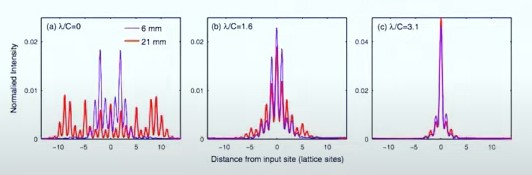

# Transfer Matrix

In the paper, the structure has a dielectric function which is stepped and periodic with period D=qdo.

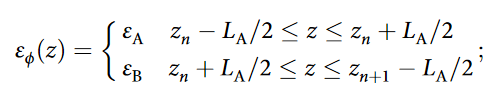

In Each layer, the Electric field can be viewed as a superposition of the left travelling wave and the right travelling wave. applying boundary conditions, we get matrix M which describes the light propagation through the interfaces.

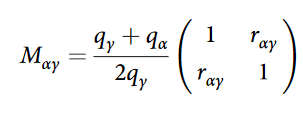

with image.png and 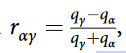

We can introduce 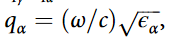 to get the propagation within eachlayer A and B to be given by:
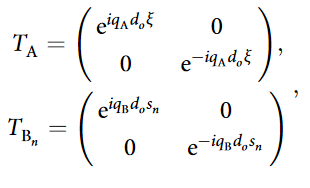

where 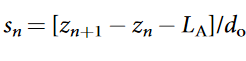 are the normalized thicknesses of the B layers.

From these, we obtain the transfer matrix for the single period T(1)(ω), the matrix connecting the fields in the left side of the elementary cell to the ones in the right side:

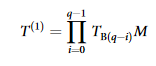 with image.png

### $\mathbf{Q(\omega, \phi, \xi)}$ **function**
To determine the existence of the edge states, one needs to specify the boundary conditions on each edge of the structure. For the left edge, this condition is given by: 
$$0 = (q_b + q_a) A_1 + (q_b - q_a) B_1$$
where $A_1$ and $B_1$ are the amplitudes of the right and left-traveling waves in the first layer of the structure. This condition can be reformulated as
$$det(b_1 , a_1) = 0$$
with $b_1 = ((q_a − q_b), (q_a + q_b))^T$ and $a_1 = (A_1, B_1)^T$, and  together with the eigenvalues $\lambda_{\pm}$ and eigenvectors $v_{\pm} = (T^{(1)}_{12}, \lambda_{\pm} - T^{(1)}_{11})$ of the transfer matrix $T^{(1)}$, it is possible to determine the existence and dispersion of edge states.\

It can be in fact shown that a proportionality relation exists between the boundary vector $b_1$ and the eigenvectors $v_{\pm}$ of the transfer matrix. So the condition for the existence of the edge states is given by $det(b_1, v_{\pm}) = 0$ in a gap where $|λ_{\pm}|<1$. This entails searching for the zeros of the function $F_{l, \pm} = (q_A - q_B)(\lambda_{\pm} - T^{(1)}_{11}) - T^{(1)}_{12} (q_A + q_B)$. \

Specifically, the real part of $F_{l,\pm} = 0$ yields the function $Q(\omega, \phi, \xi) = Re \{ T^{(1)}_{12} (q_A + q_B) - (q_A - q_B) ( T^{(1)}_{22} - T^{(1)}_{11} ) / 2 \}$.



# **Results**
In Aubry-Andre-Harper (AAH) model, identical sites are centered at positions $z_n = d_0 (n + \eta \delta^H_n)$, with $n$ an integer label, $d_0$ the primary lattics period, $\eta$ the modulation strength, and $\delta^H_n = \cos (2\pi \beta n + \phi)$ the Harper modulation. For $\beta = p/q$, with $p>0$ and $q>0$ integers, tha lattice displays two commensurate periods with $q$ sites $z_n$ in the unit cell. Properly chosen parameters give rise to nontrivial topological phases with protected states at the border of the structure (edge states). The phase $\phi$ tunes edge state eigenfrequency in the photonic band gaps.\
The photonic topological insulator used is an aray of layers $A$ of
normalized thickness $\xi= L_A / d_0$, centered in $z_n$, n an homogenous bulk of material $B$. This kind of structure can be effectively modeled by the transfer matrix technique, as seen in the following figure. \
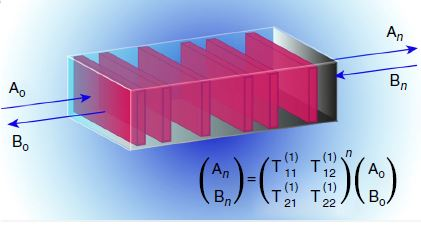 \
As detailed in Methods, we obtain the transfer matrix for the single period $T^{(1)}(\omega, \phi, \xi)$ with elements $T^{(1)}_{11}$, $T^{(1)}_{12}$, $T^{(1)}_{21}$, and $T^{(1)}_{22}$. Above figure shows the final wave amplitudes $A_n$, $B_n$ by the $n$-fold repeated action of $T^{(1)}(\omega, \phi, \xi)$ on $A_0$, $B_0$. The dielectric constant profile for the case β = 1/3 is schematically illustrated in below figure. \
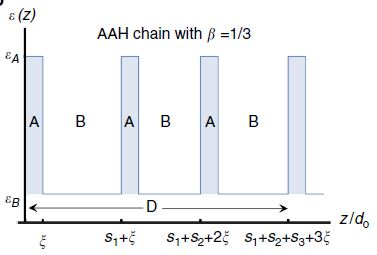 \
For $\eta = 0$, we have a periodical unmodulated structure with frequency bandgaps labeled by an integer $i$. For $\eta ≠ 0$, each gap of the unmodulated structure splits into $q$ gaps, each one labeled by indices $(i, j) (j = 1, …, q)$. This splitting is shown in below figure for $\beta = 1/3$ with respect to the variable $\chi = \phi + \pi (2\beta − 1)/2$. \
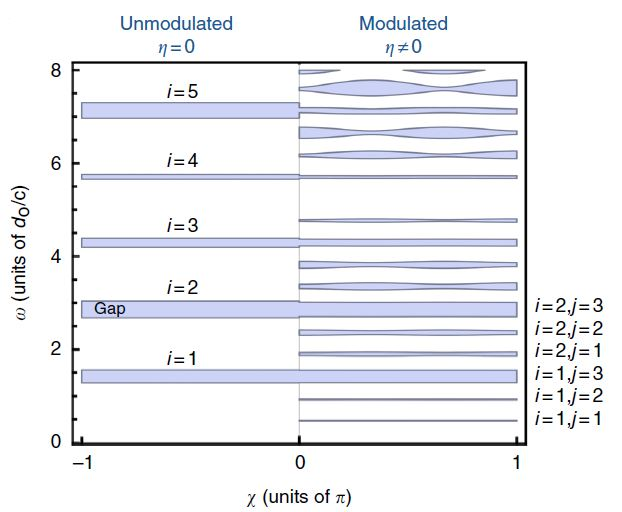 \

# Dataset Generation

We use the above knowledge and generate the dataset which has the roots of the above transfer matrices stacked together when the topology is given by chi.

Disclamer: This ipython notebook is in Python 2, which is deprecated. This decision was taken because all recourses are still easily avaliable and the authors of this ipython notebook are more comfortable with python 2.

In [1]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 47kB/s 
     |████████████████████████████████| 3.2MB 38.6MB/s 
     |████████████████████████████████| 491kB 50.9MB/s 
  Found existing installation: tensorboard 2.1.0
    Uninstalling tensorboard-2.1.0:
      Successfully uninstalled tensorboard-2.1.0
  Found existing installation: tensorflow-estimator 1.15.0
    Uninstalling tensorflow-estimator-1.15.0:
      Successfully uninstalled tensorflow-estimator-1.15.0
  Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.client import timeline
import argparse
import sys
import time
from sklearn import preprocessing
import math
from scipy import *
import scipy.constants as const
from scipy.optimize import fsolve
import logging

In [3]:
import warnings
warnings.filterwarnings("ignore")
tf.get_logger().setLevel('ERROR')

Our goal is : (Quoting the Paper that is being reproduced) 

"The training dataset was generated with 11 sets of ξ ranging from 0.10 to 0.20 in steps of 0.01 and for each set χ spans −π to π with 997 equally spaced values."

We have created the dataset and saved it as it takes a long time to run. We will demonstate how to create the dataset for ξ = 0.16 and χ = −π/2 znd π/2

In [4]:
TYPE=complex

In [5]:
cauchyIntegrationTolerance=1e-15
cauchyIntegralConvergence=1e-3

In the cell below, a class is defined which initializes a 2X2 Transfer Matrix with complex diagonals and zero non-diagonal entries.

In [6]:
class TMatrix:
        def __init__(self,n,len):
                self.n=n
                self.len=len
        def __call__(self,k):
                T=np.zeros([2,2], dtype=TYPE)
                t=exp(1j*self.n*self.len*k)
                T[0][0]=t                               
                T[1][1]=1./t
                return T

The following class creates initializes 2X2 Transfer and Reflection matrices.

In [7]:
class TransferMatrix:
        def __init__(self,na,nb,lengthA):
            #intialize self variables
            self._na=na
            self._nb=nb
            self.Rr=self.ReflectionMatrix()
            self.Rl=np.copy(self.Rr)
            self.Rl[0][1]*=-1
            self.Rl[1][0]*=-1
            self.Ta=TMatrix(na,lengthA)
        def ReflectionMatrix(self):
            #creates and returns ReflectionMatrix
            R=np.ones([2,2], dtype=TYPE)
            ra=(self._na-self._nb)/(self._na+self._nb)
            R[1][0]=R[0][1]=ra
            return R
        def Factor(self):
            qa=self._na
            qb=self._nb
            m=qa+qb
            m*=m
            m/=(4.0*qa*qb)
            return m
        def MMatrix(self,k):                                
            res=np.dot(self.Ta(k),self.Rr)
            res=np.dot(self.Rl, res)
            return self.Factor()*res        
        @staticmethod
        def dot(Tb,TMa,k):  
            # Tb(k) dot Ma(k)
            return np.dot(Tb(k),TMa.MMatrix(k))

In [8]:
def linModulation(i,phi,beta,eta):
    return 1.0+i*0.8

In [9]:
def phiModulation(i,phi,beta,eta):
    n=i+1
    z=cos(2*pi*beta*(n+1)+phi)
    return 1.0+eta*(z-cos(2*pi*beta*n+phi))


The following class has a very important function which updates the Transfer Matrix.

In [10]:
class TripleCell:
    
    def __init__ (self,  d0, na, nb, modulation, gamma):
        #intialize self variables
        self.d0=d0
        self.na=na
        self.nb=nb
        self.lenA=d0*gamma
        self.tMa=TransferMatrix(na,nb, self.lenA)
        self.modulation=modulation
        self.TM=None

    def updateTranferMatrix(self, phi, eta, beta):
        #this function updates the Transfer Matrix
        self.Tbs=[]
        for i in range(3):
            d=self.d0*self.modulation(i,phi,beta,eta)
            lenB=d-self.lenA
            self.Tbs.append(TMatrix(self.nb, lenB))
    def calc(self,omegaTilde):
        k=omegaTilde/self.d0
        self.TM=TransferMatrix.dot(self.Tbs[0],self.tMa,k)
        for i in range(1,size(self.Tbs)):
            tmp=TransferMatrix.dot(self.Tbs[i],self.tMa,k)
            self.TM=np.dot(tmp,self.TM)
        return self.TM[0][1]
        
    def __call__ (self,omegaTilde):
        if isinstance(omegaTilde,np.ndarray):
            res=np.empty_like(omegaTilde) # its not really like omega ....
            for i in range(size(res)):
                res[i]=self.calc(omegaTilde[i])
            return res
        else:
            return self.calc(omegaTilde)

In [11]:
def smudgeBox(ll,ur):
    delta=ur-ll
    return ll-delta/43.0, ur+delta/53.0

The Following two fuctions create Square Path and Sub grid wich will be used to do cauchy integral which will help in finding roots of Transfer Matrix. 

In [12]:
def mkSquarePath(ll,ur, numSteps=100):
    ul=real(ll)+1j*imag(ur)
    lr=real(ur)+1j*imag(ll)
    top=linspace(ur,ul,numSteps,endpoint=False)
    left=linspace(ul,ll,numSteps,endpoint=False)
    bottom=linspace(ll,lr,numSteps,endpoint=False)
    right=linspace(lr,ur,numSteps,endpoint=False)
    return concatenate((top,left,bottom,right))

In [13]:
def mkSubGrid(grid):
    sub=empty_like(grid)
    sub[:-1]=grid[1:]+grid[:-1]
    sub[-1]=grid[0]+grid[-1]
    sub/=2.0
    return sub

In [14]:
def cauchyIntegration(F):    
    if np.amin(np.absolute(F))<cauchyIntegrationTolerance:
        raise Exception('Zero on path')
    dF=empty_like(F)
    dF[1:]=F[1:]-F[:-1]
    dF[0] =F[0] -F[-1] # wrap-around
    return sum(dF/F)/(2j*pi),dF

The Following Function does Cauchy Integral to find the roots of the Transfer Matrix.

In [15]:
def cauchyIntegral(myFunc, pathPoints):
    F=myFunc(pathPoints)
    ci,dF=cauchyIntegration(F)
    LineIntegral0=real(ci)
    for n in range(200):
        subGrid=mkSubGrid(pathPoints)
        F=repeat(F,2)
        F[1::2]=myFunc(subGrid)
        ci, dF=cauchyIntegration(F)
        LineIntegral=real(ci) 
        delta=LineIntegral-LineIntegral0
        pathPoints=repeat(pathPoints,2)
        pathPoints[1::2]=subGrid
        if fabs(delta)<cauchyIntegralConvergence :
            logging.debug('Converged in '+str(n+1)+ ' steps ci'+str(ci)+" mesh: " +str(size(pathPoints)))
            return abs(int(round(LineIntegral))), F , dF, pathPoints        
        LineIntegral0=LineIntegral
    raise Exception('No convergence')

The Following Functions use Maths to find the roots of the Transfer Matrix.

In [16]:
def findRootsRobust(myFunc, ll, ur, thread=False):
    try :
        roots=findRoots(myFunc, ll, ur, thread)
    except Exception as e:
        logging.warning(e)
        ll,ur=smudgeBox(ll,ur)
        roots=findRoots(myFunc, ll, ur)
    return roots,ll,ur

In [17]:
def refineRoots(myFunc, estimates):
    roots=np.empty_like(estimates)
    for k in range(size(estimates)):
        roots[k]=refineRoot(myFunc, estimates[k])[0]
    return roots

In [18]:
def refineRoot(myFunc, estimate, ll=None , ur= None):
    logging.info('Estimate: '+str(estimate))
    def rfoo(xy):
        f=myFunc(xy[0]+1j*xy[1])
        return [real(f), imag(f)]
    xy,infodict,ier,mesg=fsolve(rfoo , [real(estimate), imag(estimate)],full_output=1)
    if ier != 1 :
        raise Exception('Estimate: '+str(estimate)+'\n'+mesg)
    estimate=xy[0]+1.0j*xy[1]
    logging.info('Actual: '+str(estimate))
    if ll is None and ur is None:
        return [xy[0]+1.0j*xy[1]]
    if (real(ll)<=xy[0]<=real(ur)) and (imag(ll)<=xy[1]<=imag(ur)):
        return [xy[0]+1.0j*xy[1]]
    else:
        raise Exception('Root out of Bounds')   

In [19]:
def findRoots_wrap(args):  
    return findRoots(*args)

In [20]:
def findRoots(myFunc, ll, ur, threads=False):
    nRoots,F,dF,pathPoints=cauchyIntegral(myFunc,mkSquarePath(ll,ur))
    logging.debug(str(nRoots)+ ' in: '+str(ll)+'->'+str(ur)+' mesh size '+str(size(pathPoints)))
    if nRoots==0 :
        return []
    delta=np.abs(ll-ur)
    if delta>1e-3 or nRoots>1:        
        mp=(ll+ur)/2.0
        # Quads I + II + III + IV
        Q=[[mp, ur],[real(ll)+1.j*imag(mp), real(mp)+1.j*imag(ur)],[ll,mp],[real(mp)+1.j*imag(ll), real(ur)+1.j*imag(mp)]]
        res=[]
        if threads:
            logging.debug("THREADS")
            logging.debug(__name__)
            if __name__ == '__main__' or __name__ == 'roots' :
                from multiprocessing import Pool
                pool = Pool(4)
                resP=pool.map_async(findRoots_wrap,[(myFunc,Q[0][0], Q[0][1]),(myFunc,Q[1][0], Q[1][1]),(myFunc,Q[2][0], Q[2][1]),(myFunc,Q[3][0], Q[3][1])])
                for j in range(size(resP)):
                    if resP[j] != []:
                        res+=resP[j]
                # async_result[t]=pool.apply_async(findRoots, (myFunc,Q[t][0], Q[t][1]))
        else:
            for t in range(4):
                res+=findRoots_wrap((myFunc, Q[t][0], Q[t][1]))
        return res
    else:
        # one root
        estimate=sum(pathPoints*dF/F)/(2j*pi)
        logging.info('estimate [delta]: '+str(estimate)+' ['+str(delta)+']')
        return refineRoot(myFunc,[estimate],ll,ur)

In [21]:
def phi2chi(phi):
    return phi-(pi/6.0)

In [22]:
def chi2phi(chi):
    return chi+(pi/6.0)

The following Function is used to print roots. It will print the roots only if the imaginary part of the root is negetive

In [23]:
def printRoots(phi, roots): 
    negRoots=np.asarray(roots)
    negRoots=negRoots[imag(negRoots)<0.0]
    if size(negRoots)<1:
        return
    negRoots=np.sort(negRoots)
    print phi2chi(phi),
    for i in range(size(negRoots)):
        rt=negRoots[i]
        if imag(rt)<0.0:
            print real(rt),imag(rt),
    print

This function when called will call all the functions in order to generate the roots for a given input chi

In [24]:
def generate_dataset(chi):
    tripleCell=TripleCell(d0, na, nb, phiModulation, gamma)
    phi=chi2phi(chi)
    tripleCell.updateTranferMatrix(phi,eta_fixed,beta_fixed)
    roots,tmpll,tmpur=findRootsRobust(tripleCell,ll,ur)
    printRoots(phi,roots)
    sys.stderr.flush()
    return

In [25]:
numSteps = 998
gamma = 0.16
ll = 0.01 + 1.j*-1.1
ur = 10.1 + 1.j*-1e-27
eta_fixed=0.2/pi
beta_fixed=1./3.
na = 3.0
nb = 2.0
d0=1.0    

The commented portion in the above cell can be used to make the dataset, ofcourse the print statements in PrintRoots has to be changed to 'outfile.write'. But for now we generate roots for chi = -pi/2 and pi/2

In [26]:
#Use commented portion to generate full dataset.
#from multiprocessing import Pool
#pool = Pool(4)
#chis = np.linspace(-pi,pi, numSteps)
#resP = pool.map_async(generate_dataset, chis)
#resP.wait()
chi0= -pi/2
chi1 = pi/2
generate_dataset(chi0)
generate_dataset(chi1)

-1.57079632679 0.9597698442925378 -0.04546168166695434 2.4575986432871764 -0.08831624986536386 4.005974343839009 -0.1036225324399685 5.528493009989991 -0.09838917676839873 7.007493542018329 -0.05747581941348176 8.944294217225979 -0.033265870705354236
1.57079632679 0.47355067630198117 -0.023145038348542656 1.891811865406922 -0.07205477532536761 3.3096648385595433 -0.0901725352603852 4.718407716639907 -0.09615513198506434 6.114156567273549 -0.08181296049208657 7.5033415834336346 -0.033608179253214576 8.478814378597122 -0.012139892212861617 9.922890220186515 -0.06420850187537523


# Playing around with the Dataset Generated


Loading the datasets for gamma 0.13 and 0.16 into pandas dataframe.

In [27]:
data13 = '/content/13.xls'
data16 = '/content/16.xls'

In [28]:
df13 = pd.read_excel(data13, header=None)
df16 = pd.read_excel(data16, header=None)

In [29]:
display(df13)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.952882,0.994646,-0.045683,2.534266,-0.090104,4.123107,-0.104959,5.712647,-0.101127,7.258902,-0.069520,8.764548,-0.004792,9.254828,-0.018434,NaN,NaN
1,-2.745356,1.016303,-0.020488,2.561303,-0.047155,4.144377,-0.068842,5.740176,-0.089143,7.312974,-0.106971,8.864601,-0.114110,NaN,NaN,NaN,NaN
2,-2.349119,1.008399,-0.036585,2.557726,-0.077159,4.154001,-0.098863,5.757245,-0.110814,7.328028,-0.109655,8.880057,-0.085004,NaN,NaN,NaN,NaN
3,-1.946592,0.994383,-0.045765,2.533708,-0.090203,4.122256,-0.104964,5.711434,-0.100924,7.257166,-0.068928,8.761863,-0.003859,9.252166,-0.019389,NaN,NaN
4,-2.739066,1.016222,-0.020787,2.561343,-0.047784,4.144732,-0.069612,5.740805,-0.089943,7.313747,-0.107692,8.865633,-0.114573,NaN,NaN,NaN,NaN
5,-1.940303,0.994119,-0.045846,2.533145,-0.090300,4.121393,-0.104967,5.710207,-0.100723,7.255414,-0.068343,8.759165,-0.002945,9.249504,-0.020325,NaN,NaN
6,-3.135303,1.018792,-0.000338,2.558758,-0.000814,4.127661,-0.001297,5.707947,-0.001854,7.268337,-0.002451,8.800972,-0.002939,NaN,NaN,NaN,NaN
7,-2.342829,1.008226,-0.036788,2.557530,-0.077484,4.153862,-0.099093,5.757048,-0.110801,7.327612,-0.109169,8.879302,-0.083791,NaN,NaN,NaN,NaN
8,-2.732777,1.016139,-0.021086,2.561381,-0.048408,4.145084,-0.070370,5.741427,-0.090724,7.314507,-0.108386,8.866647,-0.115000,NaN,NaN,NaN,NaN
9,-3.129014,1.018790,-0.000676,2.558761,-0.001628,4.127679,-0.002594,5.707987,-0.003707,7.268398,-0.004901,8.801069,-0.005875,NaN,NaN,NaN,NaN


Creating new datasets into which there will be a one to one correspondence between chi and the Real and imaginary parts of the roots i.e. in a row the first number is ch, second number is the Real part of the root and the third number is the imaginary part of the root. To do this, nested for loops are used.

In [30]:
dataset13 = []
dataset16 = []

In [31]:
for i in range(shape(df13)[0]):
    for j in range(shape(df13)[1]):
        temp = []
        #if j == 20:
            #break
        if j % 2 == 0:
            continue
        if np.isnan(df13[j][i]):
            break
        temp.append(df13[0][i])
        temp.append(df13[j][i])
        temp.append(df13[j+1][i])
        dataset13.append(temp)
for i in range(shape(df16)[0]):
    for j in range(shape(df16)[1]):
        temp = []
        #if j == 20:
            #break
        if j % 2 == 0:
            continue
        if np.isnan(df16[j][i]):
            break
        temp.append(df16[0][i])
        temp.append(df16[j][i])
        temp.append(df16[j+1][i])
        dataset16.append(temp)

Using zip to extract the columns. z is the column for chi, x is the column for Real part of root and y is the column for Imaginary part of the root.

In [32]:
z13, x13, y13 = zip(*dataset13)
z16, x16, y16 = zip(*dataset16)

Turing these columns to numpy arrays from python lists so that, they can be used in plotting with matplotlib.

In [33]:
npz13 = np.array(z13)
npx13 = np.array(x13)
npy13 = np.array(y13)
npz16 = np.array(z16)
npx16 = np.array(x16)
npy16 = np.array(y16)

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The below cell generates the plot of Re(omega) vs chi for gamma(xi) = 0.16 where omega is the root of the Transfer Matrix ans chi is the Euler's characteristic.

[For more on Euler's characteristic(Wikipedia)](https://en.wikipedia.org/wiki/Euler_characteristic) 

Text(0.5,1,'Re($\\omega$) vs $\\chi$ for $\\xi$ = 0.16')

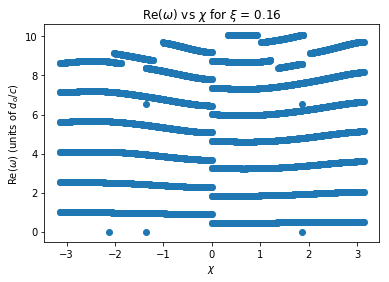

In [35]:
axes = plt.gca()
plt.scatter(npz16,npx16)
plt.xlabel(r'$\chi$')
plt.ylabel(r'Re($\omega$) (units of $d_o/c$)')
plt.title(r'Re($\omega$) vs $\chi$ for $\xi$ = 0.16')

The above plot looks like the unmodulated plot given in the paper. There are also clearly visible discontinuities due to the forbidden edge states.


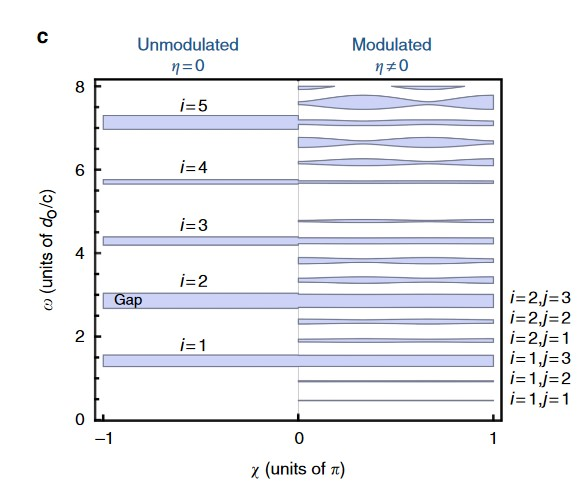


Choosing only some specific region of the plot in the above cell to get a plot which decreases at first and then increases.

Text(0.5,1,'Re($\\omega$) vs $\\chi$ for $\\xi$ = 0.16')

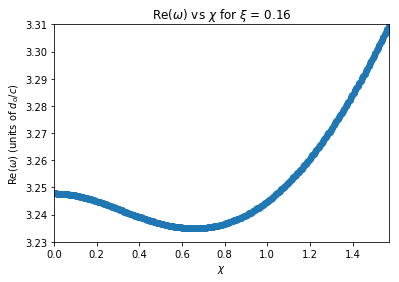

In [36]:
axes = plt.gca()
plt.scatter(npz16,npx16)
axes.set_ylim([3.23,3.31])
axes.set_xlim([0,1.57])
plt.xlabel(r'$\chi$')
plt.ylabel(r'Re($\omega$) (units of $d_o/c$)')
plt.title(r'Re($\omega$) vs $\chi$ for $\xi$ = 0.16')

This plot looks like the same plot in the paper.

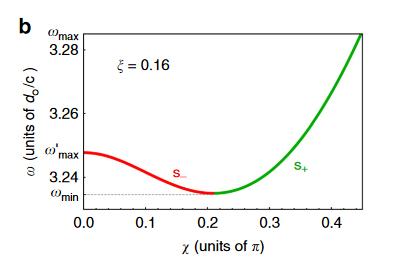

Quoting the caption of the paper for this plot.

"Edge state dispersion for a specific mode and ξ value, exhibiting a positive s+ (green) and negative s− (red) trend."

Text(0.5,1,'$\\omega$ vs $\\chi$ for $\\xi$ = 0.16')

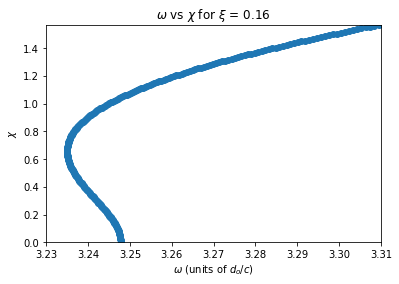

In [37]:
axes = plt.gca()
plt.scatter(npx16,npz16)
axes.set_xlim([3.23,3.31])
axes.set_ylim([0,1.57])
plt.ylabel(r'$\chi$')
plt.xlabel(r'$\omega$ (units of $d_o/c$)')
plt.title(r'$\omega$ vs $\chi$ for $\xi$ = 0.16')

The above plot is the inverse of the plot in the cell before this cell. Below is thE plot and caption of the plot in the paper.

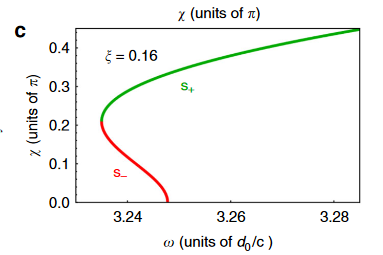

"Multivalued relationship of features and targets for the same edge mode dispersion. The s± labels are used for training the inverse model"

Below are the same type of plots for ξ = 0.13.

Text(0.5,1,'Re($\\omega$) vs $\\chi$ for $\\xi$ = 0.13')

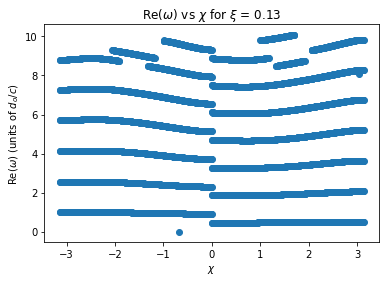

In [38]:
axes = plt.gca()
plt.scatter(npz13,npx13)
plt.xlabel(r'$\chi$')
plt.ylabel(r'Re($\omega$) (units of $d_o/c$)')
plt.title(r'Re($\omega$) vs $\chi$ for $\xi$ = 0.13')

Text(0.5,1,'Re($\\omega$) vs $\\chi$ for $\\xi$ = 0.13')

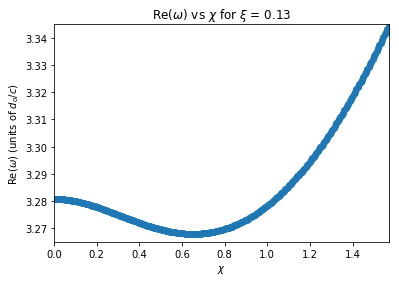

In [39]:
axes = plt.gca()
plt.scatter(npz13,npx13)
axes.set_ylim([3.265,3.345])
axes.set_xlim([0,1.57])
plt.xlabel(r'$\chi$')
plt.ylabel(r'Re($\omega$) (units of $d_o/c$)')
plt.title(r'Re($\omega$) vs $\chi$ for $\xi$ = 0.13')

Text(0.5,1,'$\\omega$ vs $\\chi$ for $\\xi$ = 0.13')

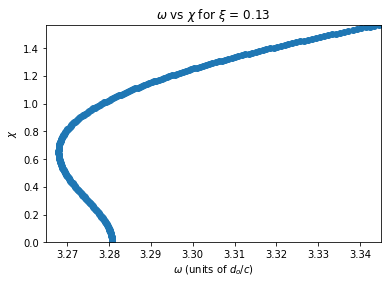

In [40]:
axes = plt.gca()
plt.scatter(npx13,npz13)
axes.set_xlim([3.265,3.345])
axes.set_ylim([0,1.57])
plt.ylabel(r'$\chi$')
plt.xlabel(r'$\omega$ (units of $d_o/c$)')
plt.title(r'$\omega$ vs $\chi$ for $\xi$ = 0.13')

# Machine Learning Model and Theory

 We are using the machine learning technique of regression in this paper. Regression is done to map a feature vector R in n dimensional space to a one dimensional scalar X. Hence,we use this technique to optimize our NN so that a given vector input (Rn) will result in a scalar (R) output, emulating the behavior of the training data.

 A regressive ***NN*** is a configuration of computational layers such that a specific set of input nodes ***I*** is connected to a single output node, through a configurable set of Nh hidden layers each containing ni nodes ***hij***, where ***i = 1, …. Nh and j = 1, …. ni.***

it is arranged such that the first layer has nodes equal to the number of input feature vectors R(n), followed by an arbitary number of hidden layers, followed by a layer consisting of a single node that gives us our regression output R. Each node has a weight attached to it that performs linear transform of all feature vectors of the previous layers followed by a non linear tranform like sigmoid or relu. Since we are performing regression the last node in our NN does not have a non linear tranform.



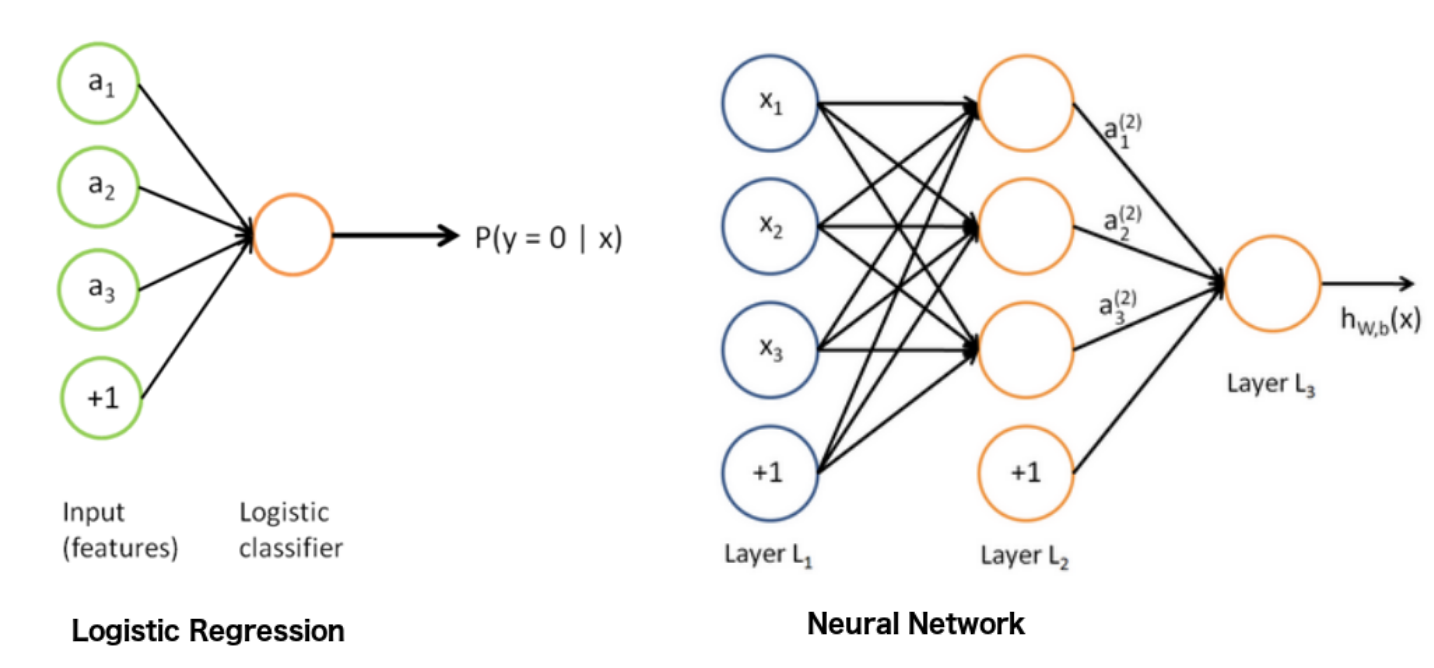

##Optimization

Optimization of the NN is performed by minimizing a cost function by a gradient descent method that updates weights and biases. In the initial state, weights wijkl are selected from a truncated normal and biases are set to zero. Training applies this procedure to a dataset randomly split into two separate classes: (i) an actual training set and (ii) a validation set. The network is iteratively updated until the error on the validating dataset converges to a given rate.

# Inverse Problem in ML

The inverse problem in artificial NN theory—and therefore in ML—is widely discussed and well understood in numerical modeling, engineering, and other fields.

The inverse topological problem at hand is to obtain the desired optical behavior: a target edge-state at frequency ωt, which is an input to the design (Fig. 2a). ML techniques achieve this result by modeling the multidimensional nonlinear relationships among all the structure parameters ωt, χ, β, ϵA, ϵB, and ξ. In our specific case, the dataset fixes ϵA, ϵB, β at the values ϵA=9, ϵB=4 and β = 1/3 , after fixing these we generate the training dataset for ωt , χ and ξ.


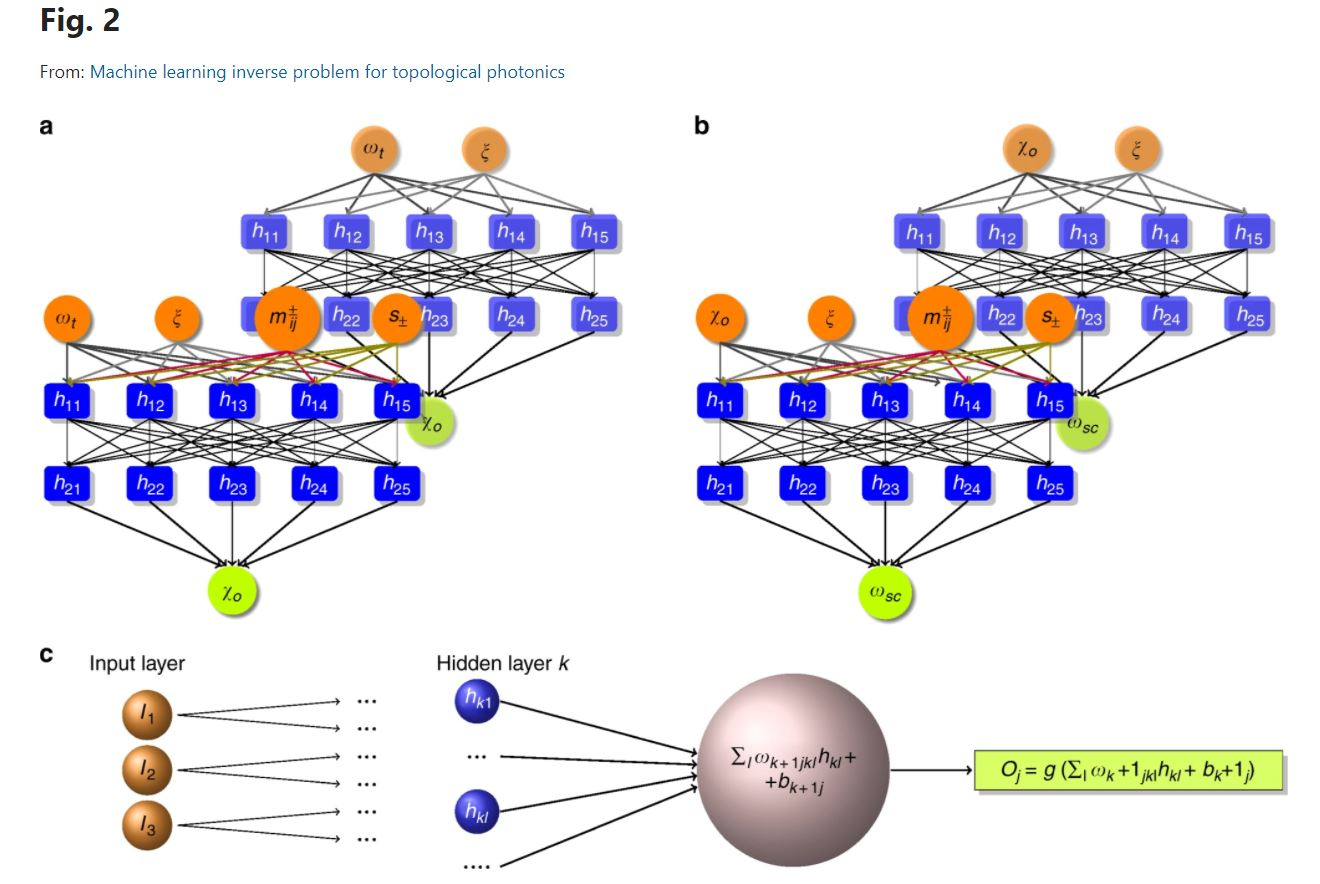

# Inverse and Direct problem

* First, we generate a dataset to train our NNs by numerically computing the complex roots of T(1)12(ω,χ,ξ) covering the region of interest for parameters χ and ξ.

* The real part of these roots, shown in Fig. 3a, represents the edge states dispersion. Interestingly the same dataset can be used both for the inverse and direct NN training phase, by suitably selecting the features and target fields.

* In The inverse problem NN (Fig. 2a) we regress the value χ = χo, a topological parameter on the basis of features including ωt and ξ. 

* For the Direct problem (Fig. 2b), we Regress the mode frequency ωt using our network whose features include the topological parameters (χ, ξ).



# Training data , partitioning of problem using Multiple NN's

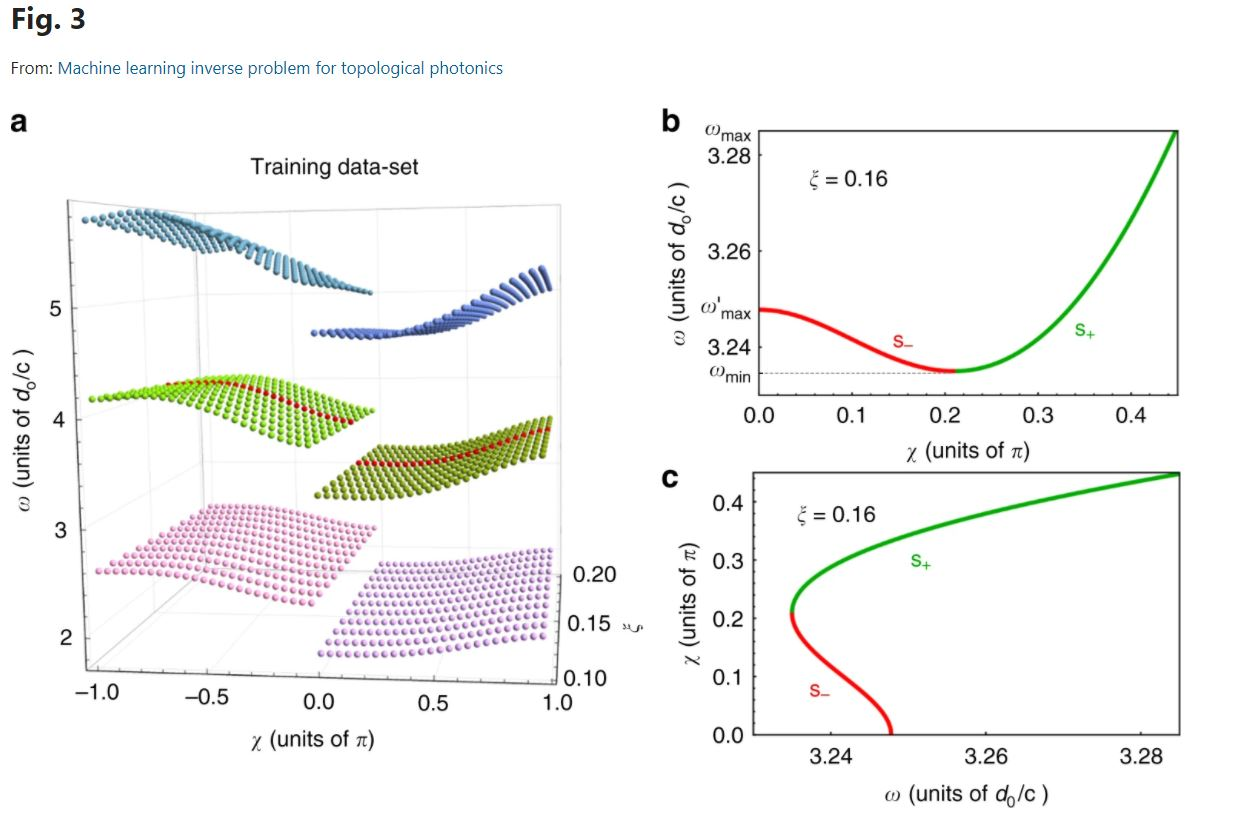

The above shown is the training data obtained for ω,χ while varying ξ from 0.10 to 0.20.

As we can see the plots obtained in fig a are discontinous between the corresponding curves. We can approach to solve this problem in 2 ways -


1.   Use single NN
2.   Use multiple NN for the two discontinous parts

We can proceed with a single NN however , the results wont be good as the NN may give regression output values that are in the forbidden state regions.

Hence we proceed with the Multiple NN aproach and transform our data by setting appropriate range values for ω,χ such that we divide it into two parts for each of the Inverse and Direct regression problems


 



# Model training

In [ ]:
# npx = real part of omega
# npy = im part of omega
# npz = chi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
print(npx13.shape,npy13.shape,npz13.shape)
x_train,x_test,y_train,y_test = train_test_split(npx13,npz13,test_size = 0.2,random_state = 0)

NameError: ignored

In [ ]:
# Regression Example With Boston Dataset: Baseline
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense , Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


#def NNmodel():
model = Sequential()
model.add(Dense(1,input_dim=1, kernel_initializer='normal', activation='relu'))
model.add(Dense(131, kernel_initializer='normal', activation='relu'))
model.add(Dense(131, kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(131, kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(131, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
opt = Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=opt)
    #return model
    
history = model.fit(x_train, y_train, epochs=2000, batch_size=500,  verbose=1, validation_split=0.2)


Train on 4326 samples, validate on 1082 samples
Epoch 1/2000
4326/4326 [==============================] - 4s 987us/step - loss: 3.1873 - val_loss: 3.1793
Epoch 2/2000
4326/4326 [==============================] - 0s 26us/step - loss: 3.1867 - val_loss: 3.1787
Epoch 3/2000
4326/4326 [==============================] - 0s 26us/step - loss: 3.1864 - val_loss: 3.1777
Epoch 4/2000
4326/4326 [==============================] - 0s 29us/step - loss: 3.1859 - val_loss: 3.1768
Epoch 5/2000
4326/4326 [==============================] - 0s 29us/step - loss: 3.1854 - val_loss: 3.1756
Epoch 6/2000
4326/4326 [==============================] - 0s 25us/step - loss: 3.1848 - val_loss: 3.1743
Epoch 7/2000
4326/4326 [==============================] - 0s 24us/step - loss: 3.1842 - val_loss: 3.1727
Epoch 8/2000
4326/4326 [==============================] - 0s 23us/step - loss: 3.1833 - val_loss: 3.1712
Epoch 9/2000
4326/4326 [==============================] - 0s 28us/step - loss: 3.1827 - val_loss: 3.1692
Epoch 

In [ ]:
opt = Adam(learning_rate=0.0001)
history = model.fit(x_train, y_train, epochs=2000, batch_size=500,  verbose=1, validation_split=0.2)


Train on 4326 samples, validate on 1082 samples
Epoch 1/2000
4326/4326 [==============================] - 6s 1ms/step - loss: 1.6001 - val_loss: 1.6795
Epoch 2/2000
4326/4326 [==============================] - 0s 22us/step - loss: 1.6093 - val_loss: 1.7144
Epoch 3/2000
4326/4326 [==============================] - 0s 23us/step - loss: 1.6145 - val_loss: 1.7055
Epoch 4/2000
4326/4326 [==============================] - 0s 23us/step - loss: 1.6009 - val_loss: 1.6898
Epoch 5/2000
4326/4326 [==============================] - 0s 26us/step - loss: 1.6005 - val_loss: 1.6865
Epoch 6/2000
4326/4326 [==============================] - 0s 24us/step - loss: 1.5992 - val_loss: 1.6789
Epoch 7/2000
4326/4326 [==============================] - 0s 23us/step - loss: 1.5988 - val_loss: 1.6885
Epoch 8/2000
4326/4326 [==============================] - 0s 27us/step - loss: 1.6014 - val_loss: 1.6813
Epoch 9/2000
4326/4326 [==============================] - 0s 24us/step - loss: 1.6046 - val_loss: 1.7201
Epoch 10

In [ ]:
model.save('/content/myModel2.h5')

['loss', 'val_loss']


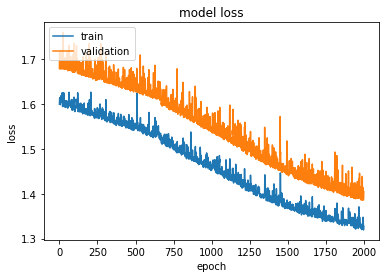

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model
model = load_model('/content/myModel2.h5')

Using TensorFlow backend.


In [ ]:
result_test= model.predict(x_test)

NameError: ignored

In [ ]:
model.evaluate(x_test,y_test)

1352/1352 [==============================] - 0s 99us/step


1.3855636775846312

# Result

Text(0.5,1,'$\\omega$ vs $\\chi$ for $\\xi$ = 0.13')

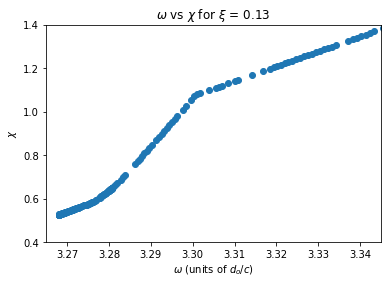

In [ ]:
# train result
result_train= model.predict(x_train)
axes = plt.gca()
plt.scatter(x_train,result_train)
axes.set_xlim([3.265,3.345])
axes.set_ylim([0.4,1.4])
plt.ylabel(r'$\chi$')
plt.xlabel(r'$\omega$ (units of $d_o/c$)')
plt.title(r'$\omega$ vs $\chi$ for $\xi$ = 0.13')

Text(0.5,1,'$\\omega$ vs $\\chi$ for $\\xi$ = 0.13')

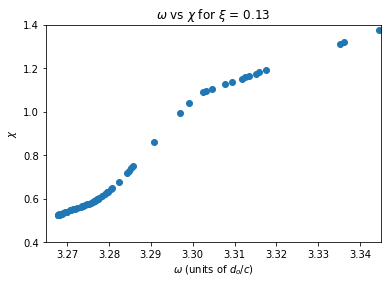

In [ ]:
# test result
axes = plt.gca()
plt.scatter(x_test,result_test)
axes.set_xlim([3.265,3.345])
axes.set_ylim([0.4,1.4])
plt.ylabel(r'$\chi$')
plt.xlabel(r'$\omega$ (units of $d_o/c$)')
plt.title(r'$\omega$ vs $\chi$ for $\xi$ = 0.13')

# **Conclusion**
We tried to solve the inverse problem in topological design by a supervised ML regression technique. We try to employ a self-consistent procedure to rule out unphysical solutions enabling tailored engineering of protected edge-states. We tried to treat discontinuous domains effectively by adopting multiple independent NNs each one specific to its domain. This general method can be extensively applied well beyond the example considered in this project and may also be exploited for other physical systems in topological science, as  polaritonics, quantum technologies and ultra-cold atoms. The method is scalable to very complex structures involving hundreds of topological devices. Further applications include 2D and 3D topological systems and quantum sources and simulations.

#Work done by individual people:



1. Aryan Kolapkar:
Wrote the code for Neural Network and read some theory related to the paper(mostly about Machine Learning)
2. Ashutosh Yadav:
Read a lot of theory related to the paper and wrote some code.
3. Gaurav Badre:
Read a lot of theory related to the paper and wrote some code.
4.Shah Heetak Jayesh:
Wrote the code for Dataset generation and graph plotting from dataset and read some theory related to the paper(mostly about Transfer Matrices and their roots)



#References


1. Machine learning inverse problem for topological photonics Laura Pilozzi, Francis A. Farrelly, Giulia Marcucci & Claudio Conti.
2. Chern numbers of Chern submanifolds, Konstantin FeldmanKonstantin Feldman.
3. Bounding singular surfaces via Chern numbers, Joaquín Moraga.
4. Photonic topological boundary pumping as a probe of 4D quantum Hall physics, Oded Zilberberg, Sheng Huang, jonathan Guglielmon, Mohan Wang, Kevin P. Chen, yaacov E. Kraus & Mikael C. rechtsman.
5. Topological Photonics, NTU- Institute of Advanced Studies, Youtube Video, https://www.youtube.com/watch?v=Cb6H3zdj6HU
6. Chemical Sciences | D4S8 18/35 Topological photonics - Moti Segev, The Israel Academy of Sciences and Humanities, Youtube Video, https://www.youtube.com/watch?v=1bA0lKCdLms
7. Topological Insulators in a Nutshell - Theory and Experiment, Xenosum, Youtube Video, https://www.youtube.com/watch?v=UF8r9zdC9Ko
8. Berry Curvature Effects in Solids - The Anomalous Hall Effect, Xenosum, Youtube Video, https://www.youtube.com/watch?v=OOfe-0vnqhw
9. What is a topological insulator?, Physics World, Youtube Video, https://www.youtube.com/watch?v=zJ0-5oCc1rU
10. Driven Aubry-Andr ́e-Harper systems, Rajath Shashidhara
11. Exploring 4D quantum Hall physics with a 2D topological charge pump, Michael Lohse, Christian Schweizer, Hannah M. Price, Oded Zilberberg & Immanuel Bloch.
12. An Introduction to Anderson Localization and Disordered Systems, Saksham Mahajan, Youtube Video, https://www.youtube.com/watch?v=k6c1YNQtDn4
13. Generalized Aubry-André-Harper model with modulated hopping and p -wave pairing, M. Yahyavi, B. Hetenyi, B. Tanatar
14. Nontrivial topological phase with a zero Chern number, H. C. Wu, L. Jin, and Z. Song
15. Higher-dimensional generalizations of the Berry curvature, Anton Kapustin and Lev Spodyneiko.
16. Non-Hermitian Chern bands and Chern numbers, Shunyu YaoFei, SongFei Song, Zhong Wang
17. Berry Curvature Renormalization, Wei Chen
18.Generalized Aubry-Andr ́e-Harper model with p-wave superconducting pairing, Qi-Bo  Zeng, Shu  Chen, and  Rong  Lu

